# MatSpy Spy Plot Anti-Aliasing

One application of spy plots is to quickly see if a matrix has a noticeable structure. Aliasing artifacts can give the false impression of structure where none exists, such as moiré or even a false grid pattern. The primary cause of aliasing artifacts is when matrix dimensions do not evenly correspond to final pixel dimensions.

MatSpy employs simple methods to reduce or eliminate some sources of aliasing.

* Tweak bucket sizes. Sometimes changing the pixel count of the spy plot by a small amount results in a good, or at least better, match between matrix and pixel dimensions. This may mean that the final spy plot dimensions may be slightly different between matrices.
* Push unevenness to the end. When the best bucket size still doesn't evenly divide a matrix, but nearly does, then the rightmost column/bottom row buckets are expanded appropriately. This way any artifacts occur at the very edge of the image instead of the middle.

These tweaks may be disabled by passing `spy_aa_tweaks_enabled=False` to any plotting method (or globally with `matspy.params.spy_aa_tweaks_enabled=False`), and are automatically disabled with manual spy plot controls like `buckets` or `dpi`.

See below to see this feature in action on structured and random matrices of various dimensions.

In [1]:
from matspy import to_sparkline
from IPython.display import display, HTML

import scipy.sparse
import numpy as np
import numpy.random
numpy.random.seed(1234)

In [2]:
def make_diags(n, shift_by=None):
    from scipy.sparse import coo_array

    if shift_by is None:
        shift_by = max(int(n/10), 2)

    rows = []
    cols = []
    for shift in range(0, n, shift_by):
        c = (np.arange(n) + shift)
        mask = c < n
        r = np.arange(n)[mask]
        c = c[mask]
        rows.append(r)
        cols.append(c)
        if shift != 0:
            rows.append(c)
            cols.append(r)

    nnz = sum(len(arr) for arr in rows)
    return coo_array((np.ones(nnz), (np.concatenate(rows), np.concatenate(cols))), shape=(n, n))
    


,AA off,,AA on,,AA off,,AA on,
n=50,,→,,,,→,,
n=51,,→,,,,→,,
n=52,,→,,,,→,,
n=65,,→,,,,→,,
n=121,,→,,,,→,,
n=137,,→,,,,→,,
n=189,,→,,,,→,,
n=234,,→,,,,→,,
n=345,,→,,,,→,,
n=350,,→,,,,→,,

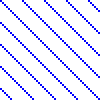
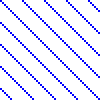
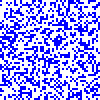
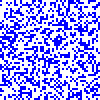
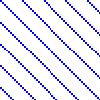
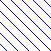
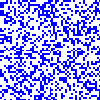
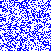
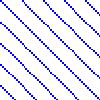
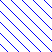
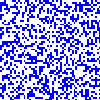
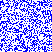
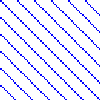
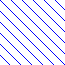
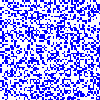
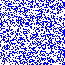
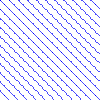
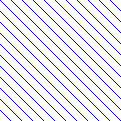
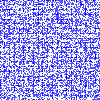
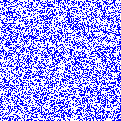
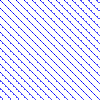
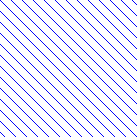
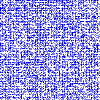
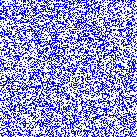
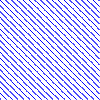
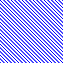
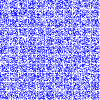
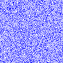
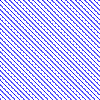
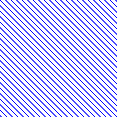
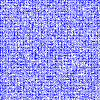
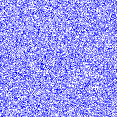
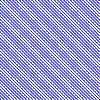
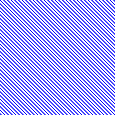
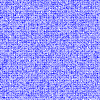
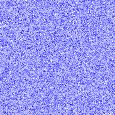
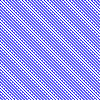
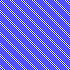
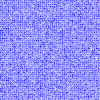
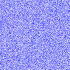
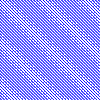
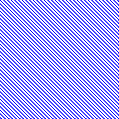
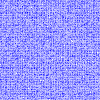
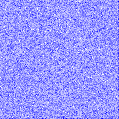
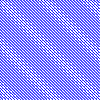
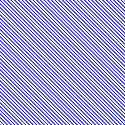
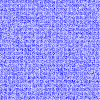
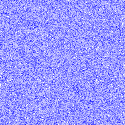
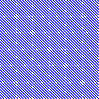
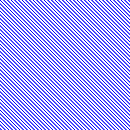
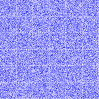
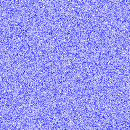
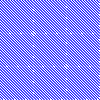
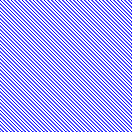
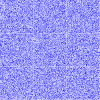
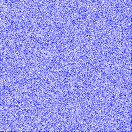
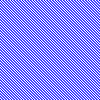
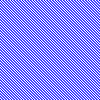
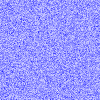
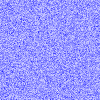
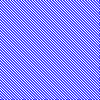
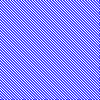
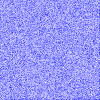
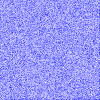
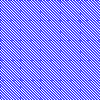
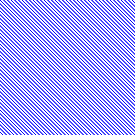
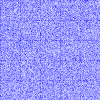
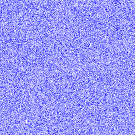
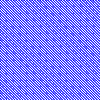
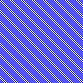
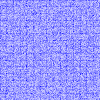
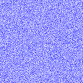

In [3]:
out = "<table>"
out += '<tr><th></th>'

center='style="text-align: center;"'
for _ in range(1):
    out += f'<th {center}>AA off</th> <th></th> <th {center}>AA on</th> <th width=30></th>'
out += f'<th {center}>AA off</th> <th></th> <th {center}>AA on</th> <th></th>'

out += "</tr>"
for size in [50, 51, 52, 65, 121, 137, 189, 234, 345, 350, 358, 375, 390, 397, 400, 401, 405, 415]:
    out += f"<tr><th>n={size}</th>"
    for sb in [11]:
        mat = make_diags(size, shift_by=sb)
        out += f"<td>{to_sparkline(mat, shading='relative', spy_aa_tweaks_enabled=False)}</td> <td>&rarr;</td>"
        out += f"<td>{to_sparkline(mat, shading='relative', spy_aa_tweaks_enabled=True)}</td> <td></td>"

    mat = scipy.sparse.random(size, size, density=0.4)
    out += f"<td>{to_sparkline(mat, shading='absolute', spy_aa_tweaks_enabled=False)}</td> <td>&rarr;</td>"
    out += f"<td>{to_sparkline(mat, shading='absolute', spy_aa_tweaks_enabled=True)}</td> <td></td>"
    out += "</tr>"
out += "</table>"
display(HTML(out))